In [19]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
if sys.path[-1] != "..": sys.path.append("..")
import model
from common import cosmology, rh_neutrino, constants, constraints
model = importlib.reload(model)
cosmology = importlib.reload(cosmology)
from common import util

# Interesting Field Evolutions -> I had (have?) a numerical problem

In [75]:
f_a = 1e10
chi0 = 1e9
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
print("%e" % H_inf)
assert m_chi < H_inf
assert m_a < H_inf
Gamma_phi = H_inf
g = 1e-3
# %time sol = model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g=g)
%time sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g) # , solver="RK45")

6.000000e+06
CPU times: user 466 ms, sys: 4 µs, total: 466 ms
Wall time: 463 ms


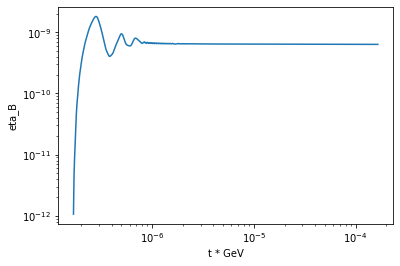

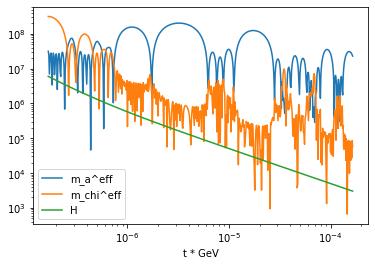

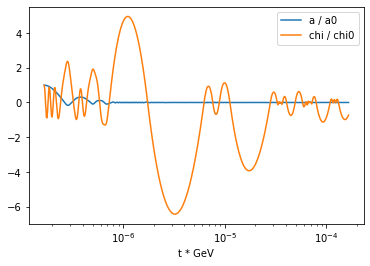

Text(0, 0.5, 'Gamma_L / H')

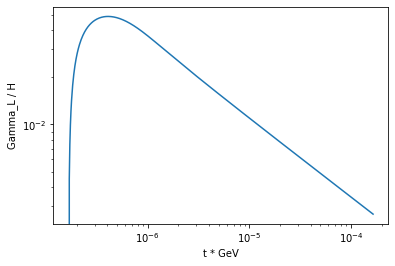

In [77]:
plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.xlabel("t * GeV")
plt.ylabel("eta_B")
plt.show()
plt.loglog(sol.t, 0*sol.t + np.sqrt(m_a**2 + g*sol.chi**2),  label="m_a^eff")
plt.loglog(sol.t, 0*sol.t + np.sqrt(m_chi**2 + g*sol.theta**2 * f_a**2), label="m_chi^eff")
plt.loglog(sol.t, sol.H, label="H")
plt.legend()
plt.xlabel("t * GeV")
plt.show()
plt.semilogx(sol.t, sol.theta, label="a / a0")
plt.semilogx(sol.t, sol.chi / chi0, label="chi / chi0")
plt.legend()
plt.xlabel("t * GeV")
plt.show()
plt.loglog(sol.t, model.calc_Gamma_L(sol.T, model.paper_sigma_eff) / sol.H)
plt.xlabel("t * GeV")
plt.ylabel("Gamma_L / H")

In [78]:
f_a = 1e9
chi0 = 1e10
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
assert m_chi < H_inf
assert m_a < H_inf
Gamma_phi = H_inf
g = 1e-3
# %time sol = model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g=g)
%time sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)

CPU times: user 378 ms, sys: 3 µs, total: 378 ms
Wall time: 375 ms


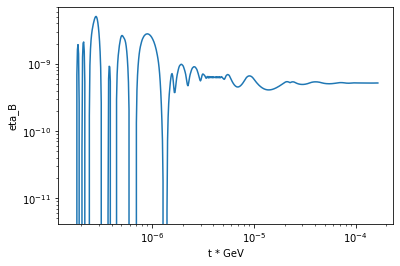

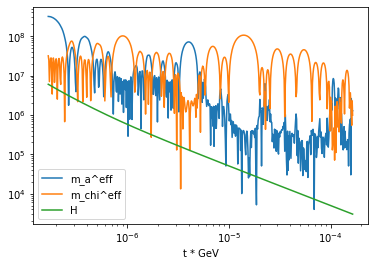

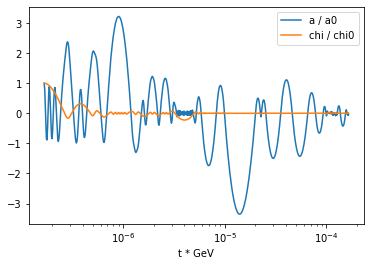

Text(0, 0.5, 'Gamma_L / H')

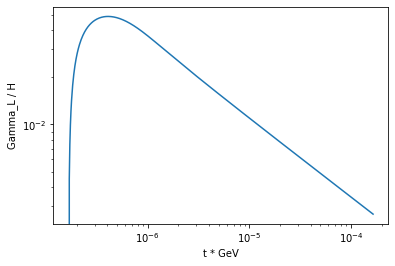

In [81]:
plt.loglog(sol.t, -cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.xlabel("t * GeV")
plt.ylabel("eta_B")
plt.show()
plt.loglog(sol.t, 0*sol.t + np.sqrt(m_a**2 + g*sol.chi**2),  label="m_a^eff")
plt.loglog(sol.t, 0*sol.t + np.sqrt(m_chi**2 + g*sol.theta**2 * f_a**2), label="m_chi^eff")
plt.loglog(sol.t, sol.H, label="H")
plt.legend()
plt.xlabel("t * GeV")
plt.show()
plt.semilogx(sol.t, sol.theta, label="a / a0")
plt.semilogx(sol.t, sol.chi / chi0, label="chi / chi0")
plt.legend()
plt.xlabel("t * GeV")
plt.show()
plt.loglog(sol.t, model.calc_Gamma_L(sol.T, model.paper_sigma_eff) / sol.H)
plt.xlabel("t * GeV")
plt.ylabel("Gamma_L / H")

# f_a, g Plane

In [28]:
f_a_range = np.geomspace(1e6, 1e9, 10)
g_range = np.geomspace(1e-4, 1e-3, 10) 
chi0 = 1e9
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
def f(f_a, g):
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    assert m_chi < H_inf
    assert m_a < H_inf
    Gamma_phi = H_inf
    return model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)
eta_B_s = np.array([[f(f_a, g) for f_a in f_a_range] for g in tqdm(g_range)])

In [29]:
util.save_data("two_field_f_a_g.pkl", m_a, m_chi, chi0, f_a_range, g_range, eta_B_s)

Text(0.5, 1.0, 'chi0 = 1.00e+09 GeV')

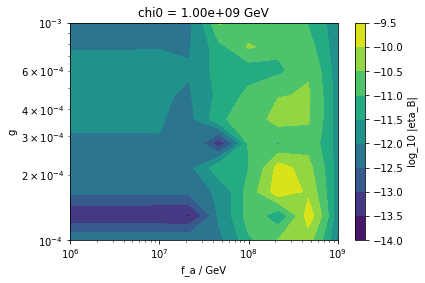

In [30]:
plt.contourf(f_a_range, g_range, np.log10(np.abs(eta_B_s))) # np.arange(-14, -9 + 1, 0.5))
plt.xscale("log"); plt.yscale("log")
plt.xlabel("f_a / GeV"); plt.ylabel("g")
plt.colorbar().set_label("log_10 |eta_B|")
plt.title(f"chi0 = {chi0:.2e} GeV")

# chi0, g Plane

In [31]:
f_a = 1e8
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
chi0_range = np.geomspace(1e5, 1e9, 10)
g_range = np.geomspace(1e-4, 1e-3, 10) 
def f(chi0, g):
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    assert m_chi < H_inf
    assert m_a < H_inf
    Gamma_phi = H_inf
    return model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)
eta_B_s_2 = np.array([[f(chi0, g) for chi0 in chi0_range] for g in tqdm(g_range)])

In [32]:
util.save_data("two_field_chi0_g.pkl", f_a, m_a, m_chi, chi0_range, g_range, eta_B_s_2)

Text(0.5, 1.0, 'f_a = 1.00e+08 GeV')

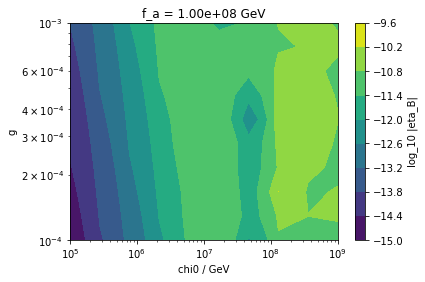

In [33]:
plt.contourf(chi0_range, g_range, np.log10(np.abs(eta_B_s_2))) # np.arange(-14, -9 + 1, 0.5))
plt.xscale("log"); plt.yscale("log")
plt.xlabel("chi0 / GeV"); plt.ylabel("g")
plt.colorbar().set_label("log_10 |eta_B|")
plt.title(f"f_a = {f_a:.2e} GeV")

# f_a, chi0 Plane

In [21]:
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
chi0_range = np.geomspace(1e7, 1e10, 10)
f_a_range = np.geomspace(1e7, 1e10, 10) 
g = 1e-3
def f(chi0, f_a):
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    assert m_chi < H_inf
    assert m_a < H_inf
    Gamma_phi = H_inf
    return model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)
eta_B_s_3 = np.array([[f(chi0, f_a) for chi0 in chi0_range] for f_a in tqdm(f_a_range)])

/home/jana/Documents/master-project/two_field_sbg/model.py:204: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/two_field_sbg/model.py:208: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


In [22]:
util.save_data("two_field_f_a_chi0.pkl", m_chi, m_a, g, f_a_range, chi0_range, eta_B_s_3)

Text(0.5, 1.0, 'g = 1.00e-03')

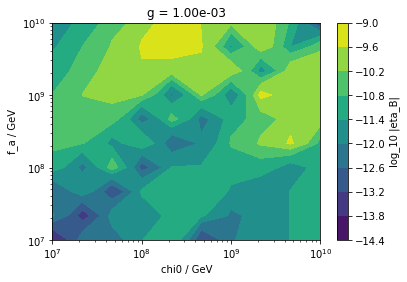

In [27]:
plt.contourf(chi0_range, f_a_range, np.log10(np.abs(eta_B_s_3))) # np.arange(-14, -9 + 1, 0.5))
plt.xscale("log"); plt.yscale("log")
plt.xlabel("chi0 / GeV"); plt.ylabel("f_a / GeV")
plt.colorbar().set_label("log_10 |eta_B|")
plt.title(f"g = {g:.2e}")

# Fixed H_inf

In [66]:
H_inf = 1e9
# minimal field value
field_min = H_inf / 6e-4
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
chi0 = field_min * 1.001
f_a = field_min
g = 1e-3
%time sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g, debug=True, converge=False, end=5e-6, solver="RK45")

interval: (1e-09, 5e-06) initial conditions: [1.27218101e+02 1.27218101e+02 0.00000000e+00 1.66666667e+12
 0.00000000e+00 0.00000000e+00 1.66833333e+12 0.00000000e+00] arguments: (6000000.000000001, 0.01, 1e-31, 1668333333333.3333)
CPU times: user 4.74 s, sys: 0 ns, total: 4.74 s
Wall time: 4.75 s


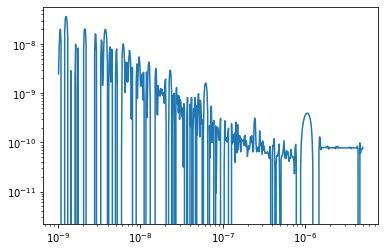

In [67]:
plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))

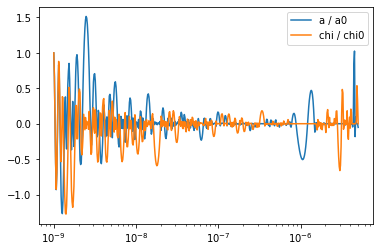

In [68]:
plt.semilogx(sol.t, sol.theta, label="a / a0")
plt.semilogx(sol.t, sol.chi / chi0, label="chi / chi0")
plt.legend()

In [40]:
"%e" % f_a

'1.666667e+12'